# K-Nearest Neighbors (K-NN) Classification using scikit-learn in Python

#### Necessary library imports

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 

#### Load and Prepare Data 

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

#### Split the data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the K-NN Model 

In [4]:
k = 3  # We can choose a different value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

#### Make predictions

In [5]:
y_pred = knn_classifier.predict(X_test)

#### Evaluate the model

In [6]:
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_rep) 

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Visualize the results

In [7]:
plt.figure(figsize=(8, 6))

X = iris.data[:, :2]  # Use only the first two features for visualization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<Figure size 800x600 with 0 Axes>

#### Create a meshgrid for visualization

In [8]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#### Predict the class for each grid point

In [9]:
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#### Plot the decision boundaries

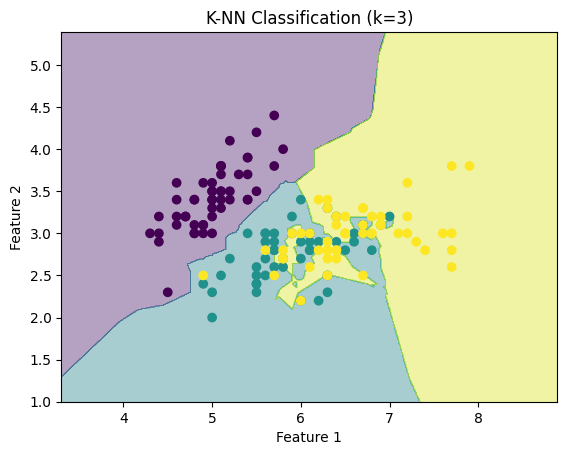

In [10]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"K-NN Classification (k={k})")
plt.show() 